## Strategy Overview

Pairs trading is a strategy that utilises the tendency of two cointegrated assets (this can be extended to an n-dimensional mean reverting portfolio) to revert to their mean/long run state space should they diverge momentarily. Put more simply, the basic idea of pairs trading is to find pairs of securities, subject to similar risks, which tend to move together. We expect to find a long run equilibrium relationship between the prices of these securities, we then construct a strategy to exploit any deviations away from this long run equilibrium.

Pairs trading is considered a form of statistical arbitrage and is a 'market neutral' strategy, theoretically enabling us to profit in any market condition. Pairs trading can also be thought of as a short volatility position, since in essence we are betting on the state of the market to revert back to its steady state (securities will generally dislocate from equilibrium in states of increased volatility, then revert back as volatility does).

For a hypothetical example, we can generate a pair of cointegrated stock price series A and B. Their prices depend on a common factor F and some random noise epsilon which is normally distributed (0,1):

$$ P_{a,t} = F_t + \epsilon_{a,t} $$
$$ P_{b,t} = F_t + \epsilon_{b,t} $$

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# generate series of random walks

np.random.seed(100)

F = [50]

for i in range(252):
    F.append(F[i] + np.random.randn())

F = np.array(F)

# price series
P_a = F + np.random.randn(len(F))
P_b = F + np.random.randn(len(F))
x = np.linspace(1,253,253)

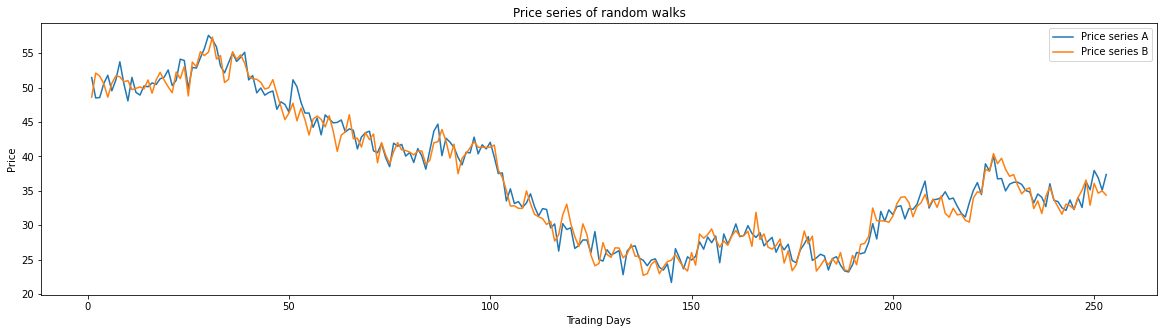

In [43]:
plt.figure(figsize=(20,5))
plt.plot(x, P_a, label = "Price series A")
plt.plot(x, P_b, label = 'Price series B')
plt.title("Price series of random walks")
plt.xlabel("Trading Days")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.show()

AS we can see the two price series move closely together, we can take advantage of this by taking a long position in A and a short position in B and see what happens:

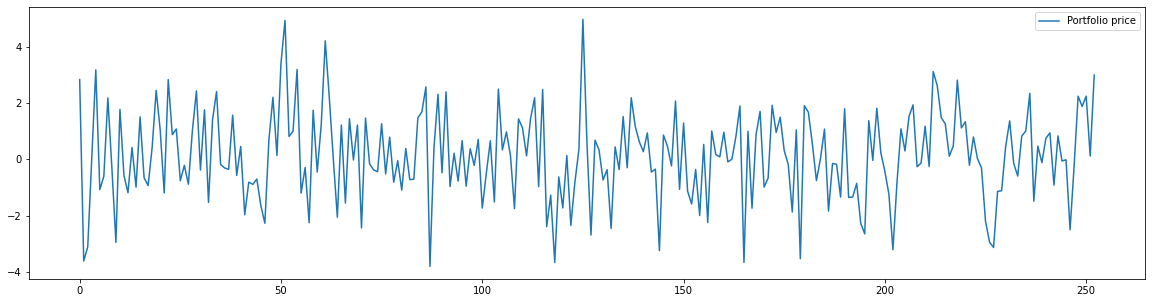

In [44]:
portfolio = P_a - P_b
plt.figure(figsize=(20,5))
plt.plot(portfolio, label = 'Portfolio price')
plt.legend()
plt.show()

The portfolio price displays mean reverting behaviour as it oscillates around zero. In creating this portfolio we are able to cancel out the random walk component of the prices series and are left with strictly white noise components.

$$ P_{a,t} - P_{b,t} = F_t + \epsilon_{a,t} - F_t - \epsilon_{b,t} = \epsilon_{a,t} - \epsilon_{b,t} $$

If we observe the portfolio price is greater than 0 then we would expect the price to revert back to 0 in the near future and vice versa. A simple strategy to exploit this would be to open a long/short position when it deviates more than 2 standard deviations from the mean:

* Open long position when portfolio is more than 2SD below mean
* Close long position when portfolio price crosses the mean from below
* Open short position when portfolio price is more than 2SD above mean
* Close short position when portfolio crosses the mean from above

Portfolio mean = 0.13, portfolio standard deviation = 1.58


Text(0.5, 1.0, 'Positions')

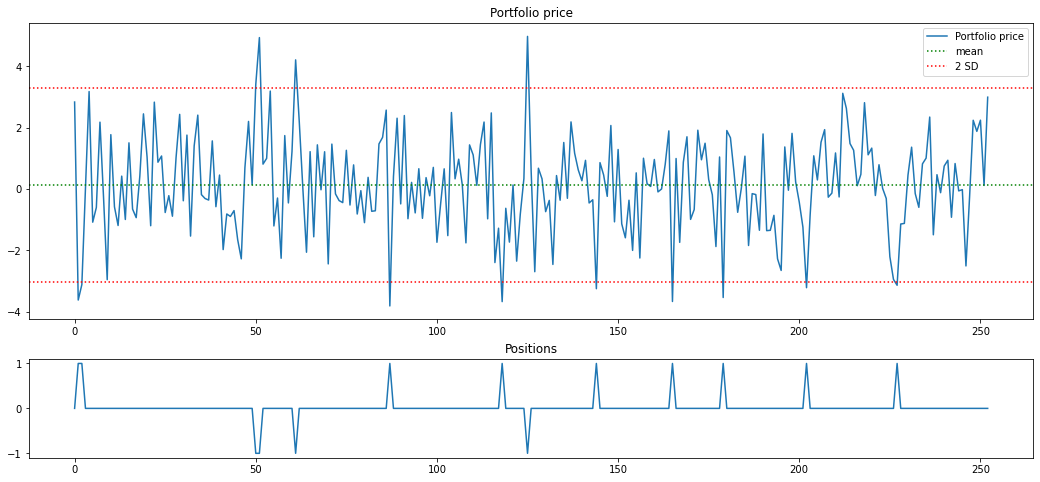

In [45]:
# Calculate portfolio mean and std
mu = portfolio.mean()
sgm = portfolio.std()

print(f"Portfolio mean = {mu:.2f}, portfolio standard deviation = {sgm:.2f}")

# calculate positions
positions = np.zeros(portfolio.shape)
positions[portfolio > mu + 2*sgm] = -1 # Short
positions[portfolio < mu - 2*sgm] = 1 # long

# plot portfolio price and positions over time
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3,1]})
f.set_figwidth(18)
f.set_figheight(8)
ax1.plot(portfolio, label='Portfolio price')
ax1.set_title('Portfolio price')
ax1.axhline(y=mu, color='g', linestyle='dotted', label='mean')
ax1.axhline(y=mu+2*sgm, color='r', linestyle='dotted', label='2 SD')
ax1.axhline(y=mu-2*sgm, color='r', linestyle='dotted')
ax1.legend(loc='upper right')
ax2.plot(positions)
ax2.set_title('Positions')

As we can see we opened 11 positions over the 252 trading days, assuming stock A and B are trading for $1 each we earn approximately 2*sgm per trade:

In [46]:
profit = 11*2*sgm
print(profit)

34.82932793182268


The intuition behind pairs trading goes back to the fundamental principle of investing: “buy undervalued – and sell overvalued”. However, to determine if the asset is truly over or undervalued, we need to know the intrinsic value, which is at best an approximation and largely what value investing sets out to do.

The problem faced by most investors is the fact that stock prices are non-stationary, meaning forecasting these prices with any statistical significance is close to impossible.

Statistical arbitrage and pairs trading tries to solve this problem using price relativity. If two assets share the same characteristics and risk exposures, then we can assume that their behavior would be similar as well. This has the benefit of not having to estimate the intrinsic value of an asset but rather just if it is under or overvalued relative to a peer(s). We only have to focus on the relationship between the two, and if the spread happens to widen, it could be that one of the securities is overpriced, the other is underpriced, or the mispricing is a combination of both. This spread of two cointegrated securities is more often than not a stationary series, and therefore is easier to forecast and build strategies around in robust manner.
